<a href="https://colab.research.google.com/github/codelspak/Codelion_weekly_projects/blob/main/WK26_W7_Mini_project__Kaggle_Regression_predicting_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 문제 설명
'Country'
'Year'
'Status'
'Life expectancy '
'Adult Mortality'
'infant deaths'
'Alcohol'
'percentage expenditure'
'Hepatitis B'
'Measles '
' BMI '
'under-five deaths '
'Polio'
'Total expenditure'
'Diphtheria '
' HIV/AIDS'
'GDP'
'Population'
' thinness  1-19 years'
' thinness 5-9 years'
'Income composition of resources'
'Schooling'

# 2. 라이브러리, 데이터셋 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('/content/drive/MyDrive/Codelion_weekly assignments/Life Expectancy Data.csv')
data.shape

(2938, 22)

# 3. 데이터 기초정보 확인

In [4]:
original_cols = data.columns.values.tolist()
print(original_cols)

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [5]:
mycols = ['country', 'year', 'nationstatus', 'lifeexpectancy', 'adult_mortality','infant_deaths',
          'alcoholconsumption', 'p_expenditure_pergdp', 'hepb_vac_rates','measles', ' bmi', 
          'under_five_deaths', 'polio', 'p_expenditure',
          'diphtheria', ' under_four_hiv/aids', 'gdp', 'population',
          'thinness_10to19', 'thinness_5to9', 'hd_index_income', 'schooling_years']

In [47]:
data.shape

(2938, 22)

In [6]:
data.columns = mycols
display(data.head(3))
display(data.sample(3))

,country,year,nationstatus,lifeexpectancy,adult_mortality,infant_deaths,alcoholconsumption,p_expenditure_pergdp,hepb_vac_rates,measles,...,polio,p_expenditure,diphtheria,under_four_hiv/aids,gdp,population,thinness_10to19,thinness_5to9,hd_index_income,schooling_years
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


,country,year,nationstatus,lifeexpectancy,adult_mortality,infant_deaths,alcoholconsumption,p_expenditure_pergdp,hepb_vac_rates,measles,...,polio,p_expenditure,diphtheria,under_four_hiv/aids,gdp,population,thinness_10to19,thinness_5to9,hd_index_income,schooling_years
577,Colombia,2014,Developing,74.6,144.0,11,4.38,1435.487755,9.0,0,...,9.0,7.20,9.0,0.1,7913.383432,47791911.0,2.1,1.9,0.720,13.6
1004,Germany,2005,Developed,79.2,85.0,3,11.67,6012.925840,9.0,778,...,95.0,1.52,96.0,0.1,34696.629200,82469422.0,1.1,1.1,0.884,16.4
1421,Kyrgyzstan,2004,Developing,67.1,218.0,4,3.41,0.000000,99.0,8,...,98.0,5.57,99.0,0.1,NaN,NaN,3.4,3.4,0.609,12.5


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               2938 non-null   object 
 1   year                  2938 non-null   int64  
 2   nationstatus          2938 non-null   object 
 3   lifeexpectancy        2928 non-null   float64
 4   adult_mortality       2928 non-null   float64
 5   infant_deaths         2938 non-null   int64  
 6   alcoholconsumption    2744 non-null   float64
 7   p_expenditure_pergdp  2938 non-null   float64
 8   hepb_vac_rates        2385 non-null   float64
 9   measles               2938 non-null   int64  
 10   bmi                  2904 non-null   float64
 11  under_five_deaths     2938 non-null   int64  
 12  polio                 2919 non-null   float64
 13  p_expenditure         2712 non-null   float64
 14  diphtheria            2919 non-null   float64
 15   under_four_hiv/aids 

### 3.1. 기술통계

In [35]:
display(data.describe().loc[:,'year':'under_five_deaths'])
display(data.describe().loc[:,'polio':])


,year,lifeexpectancy,adult_mortality,infant_deaths,alcoholconsumption,p_expenditure_pergdp,hepb_vac_rates,measles,bmi,under_five_deaths
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000


,polio,p_expenditure,diphtheria,under_four_hiv/aids,gdp,population,thinness_10to19,thinness_5to9,hd_index_income,schooling_years
count,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bc703af10>,
      dtype=object)

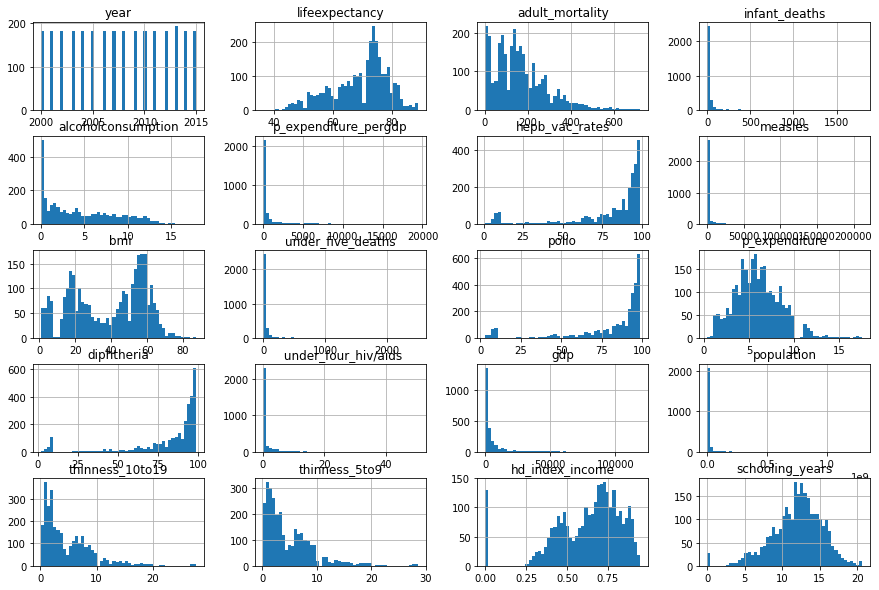

In [8]:
data.hist(figsize = (15,10), bins = 50)

### - year 데이터 수 분

In [ ]:
pd.crosstab(columns = data['country'], index = data['year'], values = data['lifeexpectancy'], aggfunc = 'mean').plot(figsize = (25, 8))


뭔가 나라가 너무 많아서 잘 안 보이지만, 그래프를 대충 살펴봤을 때 두 가지 경향이 있는 걸로 보임<br>
팀 미팅에서 얘기했던 것처럼 '국가'가 오히려 소음이 될 여지도 있으니, 이런 특성을 기준으로 클래스를 나눠보면 어떨까?<br>
1. 대충 직선형으로 쭉 증가
2. 증감 cycle 을 가지며 증가하는 두 분류가 있는 걸로 보임



#### - 성인 사망자 수(/1000명)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


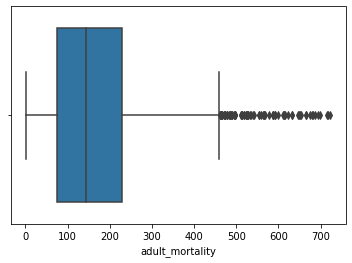

In [12]:
descam = data['adult_mortality'].describe()
_ = sns.boxplot(data['adult_mortality'])

In [25]:
data['year'].nunique()

16

In [46]:
# foo = pd.DataFrame(data.loc[data['adult_mortality'] > descam['75%'],['nationstatus', 'country']].value_counts())
foo = pd.DataFrame(data.loc[data['adult_mortality'] > 450,['nationstatus', 'country','year']])
display(foo.groupby(by = ['nationstatus', 'country'])['year'].min().sort_values(ascending = True))
print("-"*60)
display(foo.groupby(by = ['nationstatus', 'country'])['year'].max().sort_values(ascending = False))


nationstatus  country                    
Developing    Botswana                       2000
              Côte d'Ivoire                  2000
              Eritrea                        2000
              Lesotho                        2000
              Malawi                         2000
              Sierra Leone                   2000
              Swaziland                      2000
              Uganda                         2000
              United Republic of Tanzania    2000
              Zambia                         2000
              Zimbabwe                       2000
              Namibia                        2002
              South Africa                   2002
              Central African Republic       2004
              Haiti                          2010
Name: year, dtype: int64

------------------------------------------------------------


nationstatus  country                    
Developing    Lesotho                        2015
              Sierra Leone                   2014
              Central African Republic       2013
              Zimbabwe                       2011
              Haiti                          2010
              Malawi                         2010
              Swaziland                      2010
              South Africa                   2008
              Zambia                         2007
              Botswana                       2006
              Côte d'Ivoire                  2006
              Namibia                        2005
              Uganda                         2004
              United Republic of Tanzania    2004
              Eritrea                        2000
Name: year, dtype: int64

국가 별로 

In [ ]:
# p_expenditure_pergdp : 1인당 국내총생산(GDP) 대비 보건 예산 지출 비율 (%) - 얜 예산 외에 추가 지출이 있으면 100 이상이 나올 수는 있을거라 생각됨. 그치만 100 이상 비율은 확인해 볼 필요가 있을 듯

In [ ]:
# measles : 홍역, 인구 1000명당 보고된 환자 수 - 얘도 1000 이상이 존재하네? - 홍역은 재발하는 병이 아니라는데, 1000 이상의 값이 가지는 의미는? 
# http://www.samsunghospital.com/home/healthInfo/content/contenView.do?CONT_SRC=CMS&CONT_SRC_ID=09a4727a8000f380&CONT_CLS_CD=001020001013&CONT_ID=1639 (삼성서울병원)



In [ ]:
# under_five_deaths
# 75% : 28, 그 외 25% : 2500 갭이 너무 큼 
# 1) 로그 취해보거나 2) 이상치로 보고 75%값 등으로 대체해줘야지

In [ ]:
# polio , diphtheria, hd_index_income
# min = 5910.806335, 25% = 78

In [ ]:
# gdp, under_four_hiv/aids, thinness_1to19, thinness_5to9
# 75% = 3, max = 119172.741800

In [9]:
data.describe(include = ['O'])

,country,nationstatus
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f227a785c90>,
      dtype=object)

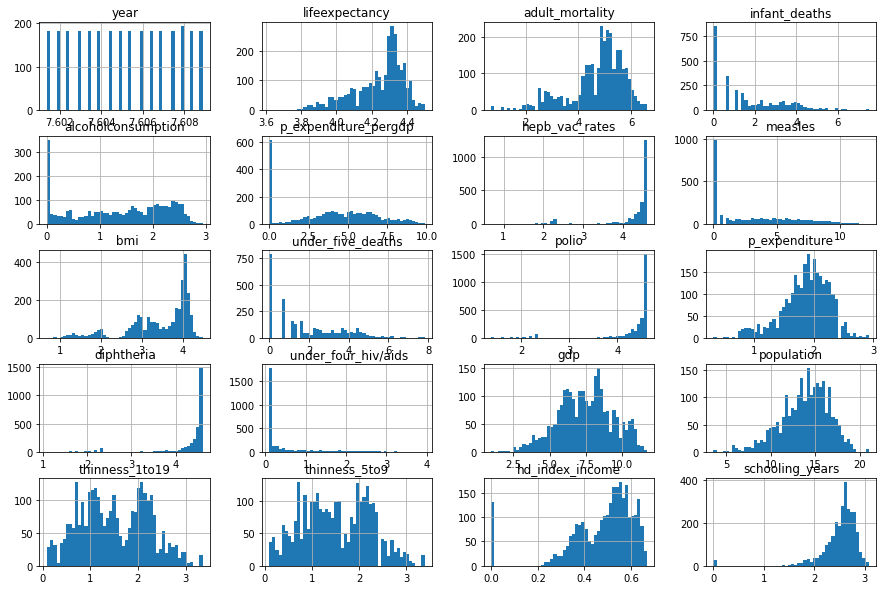

In [ ]:
temp = data.copy()
num_cols = temp.select_dtypes('number').columns.tolist()
for col in num_cols :
    temp[col] = np.log1p(temp[col])

temp.hist(figsize = (15,10), bins = 50)

# 4. 데이터 전처리 및 시각화


In [ ]:
본 프로젝트가 16년치 데이터를 다루고 있는데,
16년 혹은 15년 처럼, 데이터 다수에 대해서 한 국가가 지속적으로 높은 사망자 수를 가지고 있다는 건 "말 그대로 신호"라고 보임
- 차라리 얘를 파생변수로 만들어보면 어떨까 싶음 > 'num_year_over75%'